In [1]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
df_GDP_emp = pd.read_csv('statistics_CBS/Bbp__kwartalen__mutaties_04052022_121623.csv', delimiter=';')
df_GDP_emp.head()

,Soort mutaties,Perioden,Opbouw bbp vanuit de finale bestedingen/Beschikbaar voor finale bestedingen/Bruto binnenlands product (%)
0,"Volume, t.o.v. voorgaande periode",1996 3e kwartaal,1.4
1,"Volume, t.o.v. voorgaande periode",1996 4e kwartaal,0.7
2,"Volume, t.o.v. voorgaande periode",1997 1e kwartaal,1.1
3,"Volume, t.o.v. voorgaande periode",1997 2e kwartaal,1.0
4,"Volume, t.o.v. voorgaande periode",1997 3e kwartaal,1.5


In [3]:
df_C_emp = pd.read_csv('statistics_CBS/Bestedingen__consumptie_huishoudens_11052022_103727.csv', delimiter=';')
df_C_emp.head()

,Goederen en diensten,Perioden,Waarde/Indexcijfers (2000 = 100) (2000=100)
0,Consumptie binnenland,1995 januari,71.1
1,Consumptie binnenland,1995 februari,66.9
2,Consumptie binnenland,1995 maart,73.5
3,Consumptie binnenland,1995 april,70.2
4,Consumptie binnenland,1995 mei,71.6


In [4]:
df_GDP_sim = pd.read_csv('../results/result_data/first.csv')
GDP_sim = 100 * df_GDP_sim['GDP'].to_numpy()[100:] / df_GDP_sim['CPI'].to_numpy()[100:]

In [5]:
C_sim = 100 * df_GDP_sim['C'].to_numpy()[100:] / df_GDP_sim['CPI'].to_numpy()[100:]

In [6]:
gr_GDP_emp = df_GDP_emp['Opbouw bbp vanuit de finale bestedingen/Beschikbaar voor finale bestedingen/Bruto binnenlands product (%)'].to_numpy()

In [7]:
idx_C_emp = df_C_emp['Waarde/Indexcijfers (2000 = 100) (2000=100)'].to_numpy()
gr_C_emp = 100 * (np.log(idx_C_emp[1:]) - np.log(idx_C_emp[:-1]))

In [8]:
gr_GDP_sim = 100 * (GDP_sim[3:] - GDP_sim[:-3]) / GDP_sim[:-3]

In [9]:
gr_C_sim = 100 * (GDP_sim[1:] - GDP_sim[:-1]) / GDP_sim[:-1]

In [10]:
# generate CDF for GDP
emp_GDP_CDF = sm.distributions.ECDF(gr_GDP_emp)
sim_GDP_CDF = sm.distributions.ECDF(gr_GDP_sim)


In [11]:
# generate CDF for C
emp_C_CDF = sm.distributions.ECDF(gr_C_emp)
sim_C_CDF = sm.distributions.ECDF(gr_C_sim)

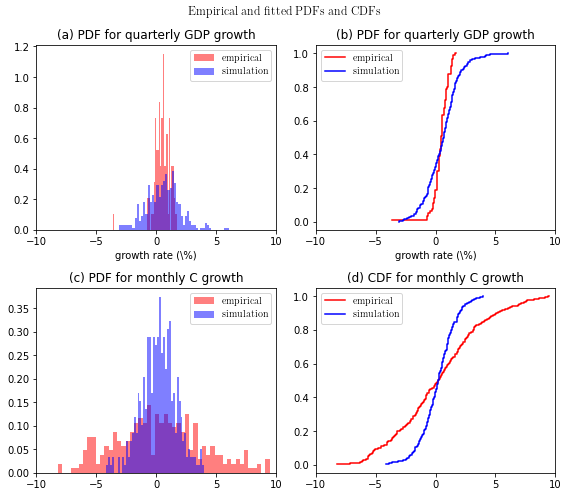

In [12]:
fig, ax = plt.subplots(2, 2, figsize=(8,7))

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

ax[0,0].hist(gr_GDP_emp, bins=50, density=True, label='empirical', color='red', alpha=0.5)
ax[0,0].hist(gr_GDP_sim, bins=50, density=True, label='simulation', color='blue', alpha=0.5)
ax[0,0].set_xlabel('growth rate (\%)')
ax[0,0].set_title('(a) PDF for quarterly GDP growth')
ax[0,0].set_xlim(-10, 10)
ax[0,0].legend()

x_GDP_emp = np.linspace(min(gr_GDP_emp), max(gr_GDP_emp), len(gr_GDP_emp))
x_GDP_sim = np.linspace(min(gr_GDP_sim), max(gr_GDP_sim), len(gr_GDP_sim))
y_GDP_emp = emp_GDP_CDF(x_GDP_emp)
y_GDP_sim = sim_GDP_CDF(x_GDP_sim)
ax[0,1].step(x_GDP_emp, y_GDP_emp, label='empirical', color='red')
ax[0,1].step(x_GDP_sim, y_GDP_sim, label='simulation', color='blue')
ax[0,1].set_xlabel('growth rate (\%)')
ax[0,1].set_title('(b) PDF for quarterly GDP growth')
ax[0,1].set_xlim(-10, 10)
ax[0,1].legend()


ax[1,0].hist(gr_C_emp, bins=50, density=True, label='empirical', color='red', alpha=0.5)
ax[1,0].hist(gr_C_sim, bins=50, density=True, label='simulation', color='blue', alpha=0.5)
ax[1,0].set_title('(c) PDF for monthly C growth')
ax[1,0].set_xlim(-10, 10)
ax[1,0].legend()

x_C_emp = np.linspace(min(gr_C_emp), max(gr_C_emp), len(gr_C_emp))
x_C_sim = np.linspace(min(gr_C_sim), max(gr_C_sim), len(gr_C_sim))
y_C_emp = emp_C_CDF(x_C_emp)
y_C_sim = sim_C_CDF(x_C_sim)
ax[1,1].step(x_C_emp, y_C_emp, label='empirical', color='red')
ax[1,1].step(x_C_sim, y_C_sim, label='simulation', color='blue')
ax[1,1].set_title('(d) CDF for monthly C growth')
ax[1,1].set_xlim(-10, 10)
ax[1,1].legend()

plt.suptitle('Empirical and fitted PDFs and CDFs')

# plt.suptitle('Quarterly growth rates in NL (1996Q2-2018Q4)')
plt.tight_layout()
plt.show()

In [13]:
# Perform 2-sample KS test
KS_test = stats.ks_2samp(gr_GDP_sim, gr_GDP_emp)
print(KS_test)

KstestResult(statistic=0.23632119514472455, pvalue=0.0005085571236841391)


In [14]:
ADF_test = sm.tsa.stattools.adfuller(gr_GDP_emp)
print(f"ADF GDP emp: p-val: {ADF_test[1]}")

ADF_test = sm.tsa.stattools.adfuller(gr_GDP_sim)
print(f"ADF GDP sim: p-val: {ADF_test[1]}")

ADF GDP emp: p-val: 6.059979470901317e-07
ADF GDP sim: p-val: 9.714287142748293e-11


In [15]:
KS_test = stats.ks_2samp(gr_C_sim, gr_C_emp)
print(KS_test)

KstestResult(statistic=0.21983705210719956, pvalue=2.509271210815456e-07)


In [16]:
ADF_test = sm.tsa.stattools.adfuller(gr_C_emp)
print(f"ADF C emp: p-val: {ADF_test[1]}")

ADF_test = sm.tsa.stattools.adfuller(gr_C_sim)
print(f"ADF C sim: p-val: {ADF_test[1]}")

ADF C emp: p-val: 0.29035246784139046
ADF C sim: p-val: 1.3267031521412165e-14
